In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
train_df.shape

(58592, 44)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
non_numeric_columns = train_df.select_dtypes(exclude='number').columns

print(non_numeric_columns)

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [ ]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
print('Shape of train dataset is',train_df.shape)
print('Shape of test dataset is',test_df.shape)

Shape of train dataset is (58592, 44)
Shape of test dataset is (39063, 43)


In [ ]:
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

X = train_df.drop('is_claim', axis=1)
Y = train_df['is_claim']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
original_column_names = X_train.columns

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[column], X_val[column]]))  # Fit on both X_train and X_val
    label_encoders[column] = le
    X_train[column] = le.transform(X_train[column])
    X_val[column] = le.transform(X_val[column])

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Optional: Convert back to DataFrame
X_train = pd.DataFrame(X_train, columns=original_column_names)
X_val = pd.DataFrame(X_val, columns=original_column_names)

In [ ]:
Y_train.value_counts()

is_claim
0    43881
1     2992
Name: count, dtype: int64

# Treating data imbalance with smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

X_train =  pd.DataFrame(X_train, columns =X.columns)

In [ ]:
Y_train.value_counts()

is_claim
0    43881
1    43881
Name: count, dtype: int64

# Logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log = LogisticRegression(max_iter = 1000)
log.fit(X_train, Y_train)



logi_train_pred = log.predict(X_train)
logi_acc_train = accuracy_score(logi_train_pred, Y_train)
print("Training Accuracy:",logi_acc_train)


logi_test_pred = log.predict(X_val)
logi_acc_test = accuracy_score(logi_test_pred, Y_val)
print("Test Accuracy:",logi_acc_test)

Training Accuracy: 0.5868257332330622
Test Accuracy: 0.5696731803054869


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_acc_train = accuracy_score(xgb_train_pred, Y_train)
print("Training Accuracy:",xgb_acc_train)

xgb_test_pred = xgb_model.predict(X_val)
xgb_acc_test = accuracy_score(xgb_test_pred, Y_val)
print("Test Accuracy:",xgb_acc_test)

Training Accuracy: 0.9467423258357831
Test Accuracy: 0.9267002303950849


In [ ]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

dtree_train_pred = dtree.predict(X_train)
dtree_acc_train = accuracy_score(dtree_train_pred, Y_train)
print("Training Accuracy:",dtree_acc_train)


dtree_test_pred = dtree.predict(X_val)
dtree_acc_test = accuracy_score(dtree_test_pred, Y_val)
print("Test Accuracy:",dtree_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.8534857923030975


# Confusion Matrix:Decision tree

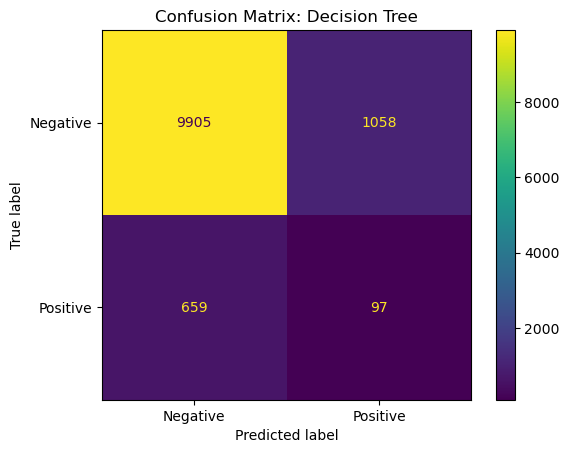

In [ ]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_val, dtree_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score


dtree_recall = recall_score(Y_val,dtree_test_pred)
dtree_precision = precision_score(Y_val, dtree_test_pred)
print("dtreeClassification model's metrics:\n")
print("Accuracy on Training Data:", round(dtree_acc_train, 2))
print("Accuracy on Test Data:", round(dtree_acc_test,2))
print("Recall Score:", round(dtree_recall,2))
print("Precision Score:", round(dtree_precision,2))

dtreeClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.85
Recall Score: 0.13
Precision Score: 0.08


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


random = RandomForestClassifier()
random.fit(X_train, Y_train)

random_train_pred = random.predict(X_train)
random_acc_train = accuracy_score(random_train_pred, Y_train)
print("Training Accuracy:",random_acc_train)


random_test_pred = random.predict(X_val)
random_acc_test = accuracy_score(random_test_pred, Y_val)
print("Test Accuracy:",random_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.8969195323833091


# confusion matrix:Random Classifier

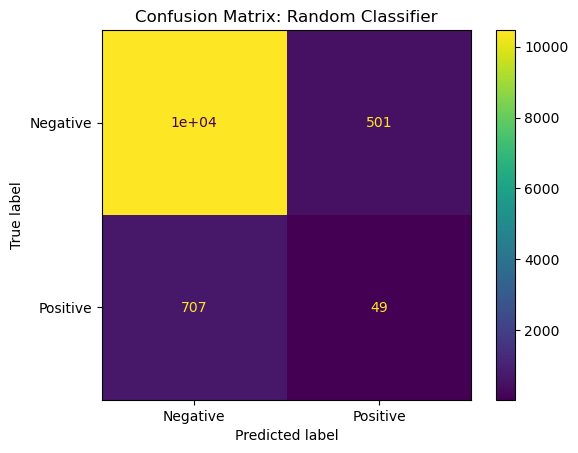

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_val, random_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Random Classifier')
plt.show()

In [ ]:
random_recall = recall_score(Y_val,random_test_pred)
random_precision = precision_score(Y_val, random_test_pred)
print("randomClassification model's metrics:\n")
print("Accuracy on Training Data:", round(random_acc_train, 2))
print("Accuracy on Test Data:", round(random_acc_test,2))
print("Recall Score:", round(random_recall,2))
print("Precision Score:", round(random_precision,2))

randomClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.9
Recall Score: 0.06
Precision Score: 0.09


# knn classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_train_pred = knn.predict(X_train)
knn_acc_train = accuracy_score(knn_train_pred, Y_train)
print("Training Accuracy:",knn_acc_train)


knn_test_pred = knn.predict(X_val)
knn_acc_test = accuracy_score(knn_test_pred, Y_val)
print("Test Accuracy:",knn_acc_test)

Training Accuracy: 0.9051183883685422
Test Accuracy: 0.7141394316921239


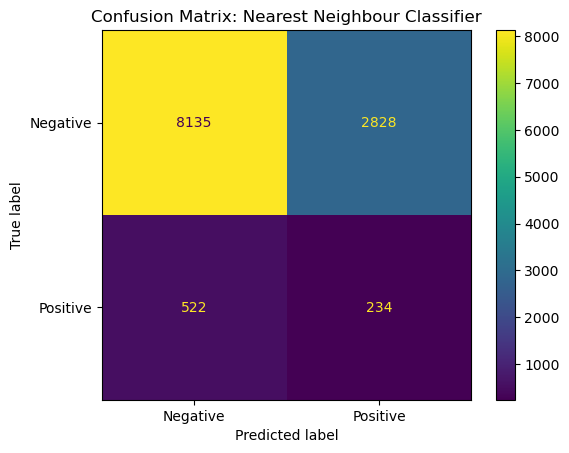

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_val, knn_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Nearest Neighbour Classifier')
plt.show()

In [ ]:
knn_recall = recall_score(Y_val,knn_test_pred)
knn_precision = precision_score(Y_val, knn_test_pred)
print("knnClassification model's metrics:\n")
print("Accuracy on Training Data:", round(knn_acc_train, 2))
print("Accuracy on Test Data:", round(knn_acc_test,2))
print("Recall Score:", round(knn_recall,2))
print("Precision Score:", round(knn_precision,2))

knnClassification model's metrics:

Accuracy on Training Data: 0.91
Accuracy on Test Data: 0.71
Recall Score: 0.31
Precision Score: 0.08


# Voting Assembles

In [ ]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier()
dtree = DecisionTreeClassifier()

voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('decision_tree',dtree) ],
    voting='hard')

In [ ]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('decision_tree', DecisionTreeClassifier())])

In [ ]:
voting_train_pred = voting.predict(X_train)
voting_acc_train = accuracy_score(voting_train_pred, Y_train)
print("Training Accuracy:",voting_acc_train)


voting_test_pred = voting.predict(X_val)
voting_acc_test = accuracy_score(voting_test_pred, Y_val)
print("Test Accuracy:",voting_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.9211536820547829


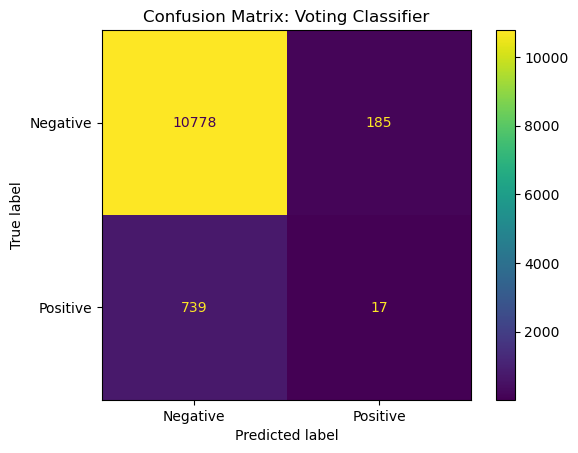

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_val, voting_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Voting Classifier')
plt.show()

In [ ]:
voting_recall = recall_score(Y_val,voting_test_pred)
voting_precision = precision_score(Y_val, voting_test_pred)
print("votingClassification model's metrics:\n")
print("Accuracy on Training Data:", round(voting_acc_train, 2))
print("Accuracy on Test Data:", round(voting_acc_test,2))
print("Recall Score:", round(voting_recall,2))
print("Precision Score:", round(voting_precision,2))

votingClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.92
Recall Score: 0.02
Precision Score: 0.08


# Testing The DATA of test.csv

In [ ]:
test_data = pd.read_csv('test.csv')

categorical_columns = [
    'policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
    'max_torque', 'max_power', 'engine_type', 'is_esc',
    'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'rear_brakes_type', 'transmission_type',
    'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'
]

def encode_categorical(data, categorical_columns):
    
    for col in categorical_columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
    return data


test_data = encode_categorical(test_data, categorical_columns)

scaler = StandardScaler()

test_data_scaled = scaler.fit_transform(test_data)

predictions = voting.predict(test_data_scaled)

test_data['is_claim'] = predictions
test_data.to_csv('test_with_predictions.csv', index=False)

B:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
B:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
